SVM without PCA
Accuracy: 0.9814814814814815
Confusion Matrix:
 [[19  0  0]
 [ 0 21  0]
 [ 0  1 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


SVM with PCA (2 components)
Accuracy: 0.9814814814814815
Confusion Matrix:
 [[18  1  0]
 [ 0 21  0]
 [ 0  0 14]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0

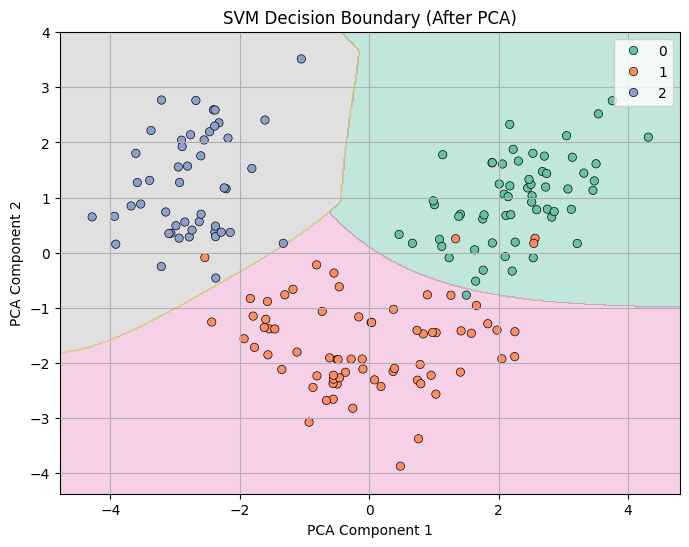

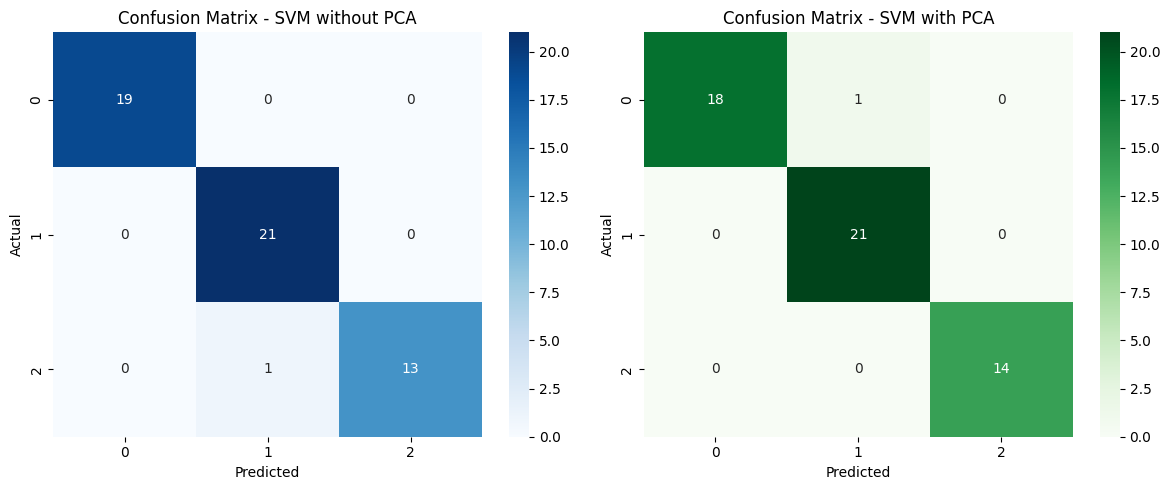

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


data = load_wine()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("SVM without PCA")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm_no_pca = confusion_matrix(y_test, y_pred)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)


svm_pca = SVC(kernel='rbf', random_state=42)
svm_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = svm_pca.predict(X_test_pca)

print("\nSVM with PCA (2 components)")
print("Accuracy:", accuracy_score(y_test_pca, y_pred_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test_pca, y_pred_pca))
print("Classification Report:\n", classification_report(y_test_pca, y_pred_pca))

cm_pca = confusion_matrix(y_test_pca, y_pred_pca)

h = 0.02
x_min, x_max = X_pca[:, 0].min() - 0.5, X_pca[:, 0].max() + 0.5
y_min, y_max = X_pca[:, 1].min() - 0.5, X_pca[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set2", edgecolor='k')
plt.title("SVM Decision Boundary (After PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# Heatmaps of confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_no_pca, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM without PCA")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - SVM with PCA")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()
